# Mobile plans research

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [2]:
calls = pd.read_csv('calls.csv')
sessions = pd.read_csv('internet.csv', index_col=0)
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Let's explore information about calls.

In [3]:
display(calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


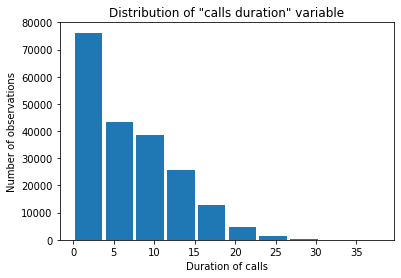

In [6]:
calls['duration'].hist(rwidth=0.9)
plt.xlabel('Duration of calls')
plt.ylabel('Number of observations')
plt.title('Distribution of "calls duration" variable')
plt.grid()
plt.show()

We see the right-skewed distribution. The longer the call duration, the fewer people who talk on the phone for that long. In adition, there are many calls with zero duration - it is missed calls.

Next, we will study information on Internet traffic.

In [16]:
display(sessions.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [17]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


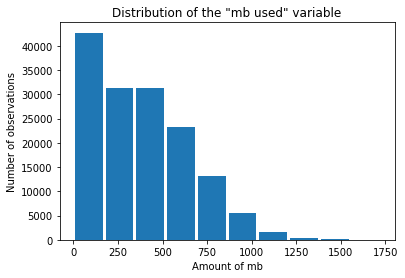

In [7]:
sessions['mb_used'].hist(rwidth=0.9)
plt.xlabel('Amount of MB')
plt.ylabel('Number of observations')
plt.title('Distribution of the "MB used" variable')
plt.grid()
plt.show()

There is also right-skewed distribution. Most customers use 0-250 MB of Internet, some of them use 1250-1500 MB.

Now let's look at the message information.

In [8]:
display(messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [9]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Below we summarised information on each of the two tariffs.

In [10]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Finally, information about users:

In [23]:
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


## Data preprocessing

Let's change data type of the columns with data (from object to datetime type) using the `to_datetime()` method.

- `reg_date` from `users` table
- `churn_date` from`users` table
- `call_date` from `calls` table
- `message_date` from `messages` table
- `session_date` from `sessions` table

In [12]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format='%Y-%m-%d')

In the `duration` column of the `calls` dataframe, the data type is `float`. Let's round the values using the `numpy.ceil()` method and change the data type to `int`.

In [15]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Let's create a `month` column in the `calls`, `messages`, `sessions` dataframes with the number of month from the `call_date`, `message_date` and `session_date` columns respectively.

In [16]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

In [17]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [18]:
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month

Let's count the number of calls made by each user and group it by month.

In [19]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))

In [20]:
display(calls_per_month.head(10))

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

Let's calculate the sum of spent minutes used by each user and group it by month.

In [21]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))

In [22]:
display(minutes_per_month.head(10))

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

Let's count the number of messages sent by each user and group it by month.

In [23]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))

In [24]:
display(messages_per_month.head(10))

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

Let's calculate the sum of megabytes spent by each user and group it by month.

In [25]:
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [26]:
display(sessions_per_month.head(10))

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

## Data analysis and revenue calculation

Let's merge all values calculated above and create dataframe `user_behavior`.

Thus, we have information on the tariff, number of calls, messages and spent megabytes for each "user - month" pair.

In [27]:
user_behavior = (calls_per_month
                .merge(messages_per_month, left_index=True, right_index=True, how='outer')
                .merge(sessions_per_month, left_index=True, right_index=True, how='outer')
                .merge(minutes_per_month, left_index=True, right_index=True, how='outer')
                .reset_index()
                .merge(users, how='left', left_on='user_id', right_on='user_id')
)

In [28]:
display(user_behavior.head())

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Let's count missing values in `user_behavior` data frame.

In [29]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

We decided to fill in missing values with zeros.

In [30]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Now let's add information on tariffs to data frame.

In [32]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
user_behavior = user_behavior.merge(tariffs, on='tariff')

Let's count the number of extra minutes, messages and megabytes for each user.

In [33]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

# if the number of spent minutes and etc. does not exceed the number of minutes included,
# we get negative value and can replace it with zero since user did not use extra minutes and etc.

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Let's convert extra megabytes to gigabytes.

In [34]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Now, we will calculate cost of paid extra minutes, messages and the Internet.

In [36]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Finally, let's get total cost for each user – we will sum monthly fee with the price paid for extra minutes, messages and gb.

In [37]:
user_behavior['total_cost'] = \
user_behavior[['rub_monthly_fee', 'cost_minutes', 'cost_messages','cost_gb']].sum(axis=1)

Let's create a `stats_df` where for each "month-tariff" pair we will get the mean, standard deviation and median. 

We will group data by month and tariff using `pivot_table` and calculate the corresponding metrics for `calls`, `minutes`, `messages` and `mb_used` values.

In [38]:
stats_df = user_behavior.pivot_table(
    index=['month', 'tariff'],
    values=['calls', 'minutes', 'messages', 'mb_used'],
    aggfunc=['mean', 'std', 'median']
).round(3).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

display(stats_df.head(10))

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.676,8513.718,18.235,203.853,20.812,6444.681,16.198,154.231,20.5,7096.185,15.0,162.5
1,1,ultra,59.444,13140.681,33.778,428.111,41.639,6865.347,30.671,269.758,51.0,14791.370,32.0,382.0
2,2,smart,40.190,11597.054,24.086,298.690,25.394,6247.354,21.751,190.820,38.5,12553.710,20.0,258.0
3,2,ultra,41.542,11775.938,21.958,297.125,40.972,10644.644,26.774,296.513,25.0,7327.125,5.5,168.0
4,3,smart,54.325,15104.159,31.857,390.052,25.537,5828.238,26.805,191.894,59.0,15670.250,23.0,409.0
5,3,ultra,67.676,17535.550,32.297,489.649,44.838,10951.786,41.622,333.744,57.0,17495.180,20.0,403.0
6,4,smart,51.312,13462.181,30.741,367.134,25.705,5698.249,24.539,186.489,52.0,14087.650,28.0,368.5
7,4,ultra,64.091,16828.134,31.564,458.018,36.272,9718.650,37.514,267.682,61.0,16645.780,17.0,453.0
8,5,smart,55.241,15805.184,33.773,387.362,25.377,5978.232,27.037,186.601,59.0,16323.940,30.0,433.0
9,5,ultra,72.507,19363.153,37.851,510.328,41.081,10046.110,40.307,289.604,75.0,18696.430,25.0,519.0


Let's study the distribution of the average number of calls by months. We will group data on graph by tariff plan.

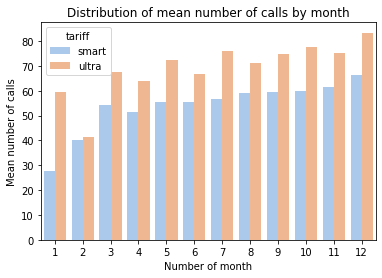

In [44]:
ax = sns.barplot(x='month', 
            y='calls_mean', 
            hue="tariff",
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Distribution of mean number of calls by month')
ax.set(xlabel='Number of month', ylabel='Mean number of calls')
plt.show()

Now let's study the distribution of number of calls made by customers using different tariffs.

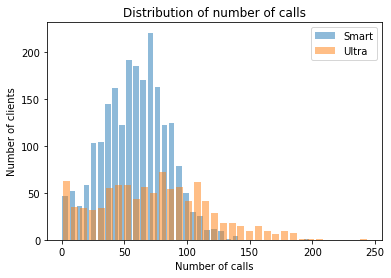

In [45]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.title('Distribution of number of calls')
plt.show()

Next, we will study the distribution of the average duration of calls by months. We will group data on graph by tariff plan.

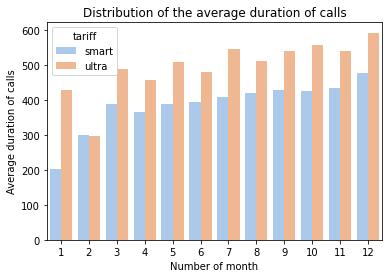

In [42]:
ax = sns.barplot(x='month', 
            y='minutes_mean', 
            hue="tariff",
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Distribution of the average duration of calls')
ax.set(xlabel='Number of month', ylabel='Average duration of calls')
plt.show()

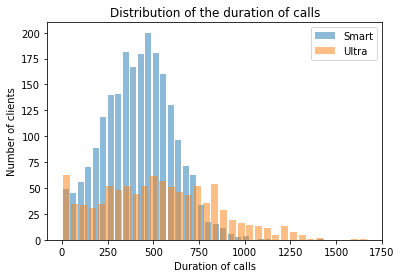

In [46]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, rwidth=0.8)
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('Duration of calls')
plt.ylabel('Number of clients')
plt.title('Distribution of the duration of calls')
plt.grid()
plt.show()

**Summary:** The average duration of calls for Ultra tariff users is longer than for Smart tariff users. During the year, there is an increase in the average duration of the calls for users of both tariffs. The growth of the average duration of calls for clients of the Smart plan is stable throughout the year. However, we cannot see the similar trend for Ultra tariff users. In February, subscribers of both tariff plans had the lowest rates.

Now let's study the distribution of the average number of messages by months. We will group data on graph by tariff plan.

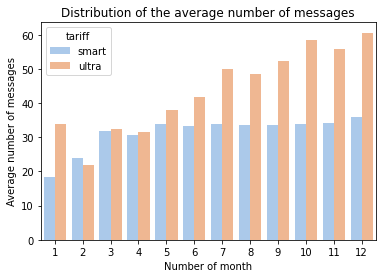

In [56]:
ax = sns.barplot(x='month', 
            y='messages_mean', 
            hue="tariff",
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Distribution of the average number of messages')
ax.set(xlabel='Number of month', ylabel='Average number of messages')
plt.show()

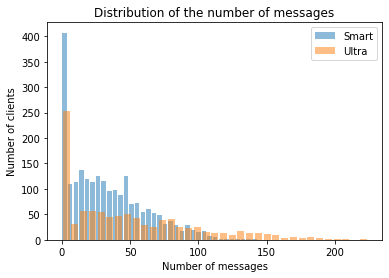

In [48]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, rwidth=0.8, label='Smart')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, rwidth=0.8, label='Ultra')

plt.legend()
plt.xlabel('Number of messages')
plt.ylabel('Number of clients')
plt.title('Distribution of the number of messages')
plt.grid()
plt.show()

**Summary:** Ultra plan users on average send more messages than Smart plan users. The number of messages during the year is growing for users of both tariffs. The dynamics of sending messages is similar to the trends in the duration of calls. Thus, in February, the smallest number of messages was sent.

Finally, let's study the distribution of mobile Internet traffic by months.

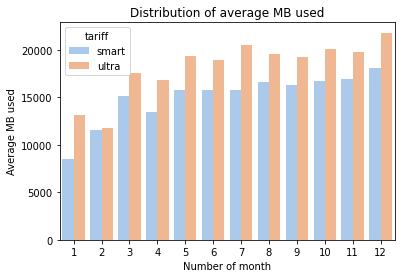

In [52]:
ax = sns.barplot(x='month', 
            y='sessions_mean', 
            hue="tariff", 
            data=stats_df,
            palette=sns.color_palette("pastel")[0:2])

ax.set_title('Distribution of average MB used')
ax.set(xlabel='Number of month', ylabel='Average MB used')
plt.show()

Let's compare the distribution of megabytes spent by Smart and Ultra tariffs clients.

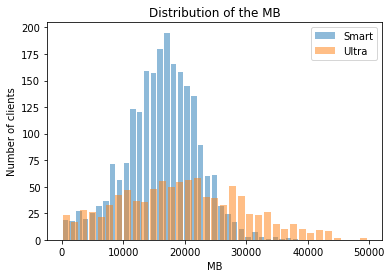

In [53]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, rwidth=0.8)
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, rwidth=0.8)

plt.legend(['Smart', 'Ultra'])
plt.xlabel('MB')
plt.ylabel('Number of clients')
plt.title('Distribution of the MB')
plt.grid()
plt.show()

**Summary:** Users do not actively use the mobile Internet in January, February and April. Clients of the Smart plan usually spend 15-17 GB, and users of the Ultra plan - 19-21 GB.

### Hypotheses testing

As we can see from the results of data analisys, users' behaviour is different. Ultra plan customers, on average, make more (and longer) phone calls, send more messages and spend more time on the Internet than Smart plan users. Does it mean that the revenue from these two tariffs is different?

Hypothesis: the average revenue from Ultra and Smart tariffs are different.

```
H_0: Total cost "Ultra" = Total cost "Smart"
H_a: Total cost "Ultra" ≠ Total cost "Smart"
alpha = 0.05
```

In [54]:
# use Student's test for independent samples

results = st.ttest_ind(
    user_behavior.query('tariff == "ultra"')['total_cost'],
    user_behavior.query('tariff == "smart"')['total_cost'],
    equal_var = False
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

4.2606313931076085e-250
Reject the null hypothesis


**Summary:** We reject the null hypothesis: the revenue from the two tariffs are different.

In addition, let's test the hypothesis that users from Moscow bring more profit than users from other cities:

```
H_0: Total cost Moscow users = Total cost not Moscow users
H_1: Total cost Moscow users ≠ Total cost not Moscow users
alpha = 0.05
```

In [55]:
results = st.ttest_ind(
    user_behavior.query('city == "Москва"')['total_cost'],
    user_behavior.query('city != "Москва"')['total_cost'],
)

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

0.5440152911670224
Failed to reject the null hypothesis


**Summary:** We failed to reject the null hypothesis: users from Moscow do not bring more profit than users from other cities.

## Conclusion

In this research, we analyzed a small sample of Ultra and Smart plans users. As a result, we found out that customers use tariffs differently. Therefore, we assumed that the revenue from different tariffs would be different. In addition, we suggensted that users from Moscow would bring more profit than users from other cities. 

Our hypothesis that the revenue from Ultra and Smart tariffs is different was confirmed (alpha < 0.05). The second hypothesis that users from Moscow bring more profit that users from other cities was not confirmed.